In [173]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.image import imread
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten, GlobalAveragePooling2D, Dense, Input
from sklearn.preprocessing import LabelEncoder
num_img = 32

## Generate prod_cat . product+category of 3 classes

In [100]:
prod_df = pd.read_csv('C:/Users/IDU/OneDrive - GTÜ/Desktop/TEZ/MODANISA/prod_details.csv', low_memory=False)

prod_df = prod_df[['productid', 'category']]

df = prod_df.loc[ prod_df['category'].isin(['Tesettür Elbise','Takım','Tunik'])]

num_classes = 3

df = df.astype('str')

In [101]:
df.head()

,productid,category
3,1168509,Tunik
5,7981329,Takım
20,7978162,Tesettür Elbise
44,1792618,Tesettür Elbise
64,1371598,Tunik


In [102]:
path = "C:/Users/IDU/OneDrive - GTÜ/Desktop/TEZ/poses/NPdata/"
dirlist = os.listdir(path)

prod_cat = []
posedf = pd.DataFrame(columns=["productid","category"])
for i, each in enumerate(dirlist):
    
    if (each.split("."))[0] in df.values:
        print(each)
        id =str((each.split("."))[0])
        prod = (df[df['productid'] == id].values)[0][0]
        cat =(df[df['productid'] == id].values)[0][1] 
        prod_cat.append([prod, cat])
        

1001277.npy
1001279.npy
1001317.npy
1001804.npy
1001814.npy
1001815.npy
1001816.npy
1001817.npy
1001818.npy
1002403.npy
1002417.npy
1002418.npy
1002419.npy
1002420.npy
1002421.npy
1002422.npy
1002423.npy
1002424.npy
1002431.npy
100389.npy
100390.npy
1006098.npy
1006099.npy
1006100.npy
1006101.npy
1006102.npy
1006103.npy
1006104.npy
1006105.npy
1006106.npy
1006108.npy
1006109.npy
1006114.npy
1006115.npy
1006116.npy
1006117.npy
1006126.npy
1006128.npy
1006135.npy
1006138.npy
1006232.npy
1006235.npy
1006489.npy
1014106.npy
1014769.npy
1014770.npy
1014797.npy
1014799.npy
1014827.npy
1014828.npy
1014924.npy
1014925.npy
1014927.npy
1019867.npy
1021680.npy
1021682.npy
1021683.npy
1021733.npy
1021734.npy
1021736.npy
1021737.npy
1021841.npy
1022061.npy
1022063.npy
1022081.npy
1022082.npy
1022090.npy
1022091.npy
1022092.npy
1025448.npy
1025449.npy
1025450.npy
1025451.npy
1025452.npy
1025453.npy
1025454.npy
1025473.npy
1025474.npy
1025475.npy
1025476.npy
1025485.npy
1025486.npy
1025487.npy
102548

1079719.npy
1079720.npy
1079721.npy
1079722.npy
1079723.npy
1079724.npy
1079725.npy
1079726.npy
1079727.npy
1079728.npy
1079729.npy
1079730.npy
1079731.npy
1079732.npy
1079733.npy
1079734.npy
1079735.npy
1079736.npy
1079737.npy
1079738.npy
1079739.npy
1079752.npy
1079796.npy
1079797.npy
1079799.npy
108061.npy
1080654.npy
1080655.npy
1080658.npy
1080798.npy
1080799.npy
1082158.npy
1082192.npy
1082193.npy
1082194.npy
1082965.npy
1082966.npy
1082968.npy
1082969.npy
1082971.npy
1082972.npy
1083226.npy
1083232.npy
1083234.npy
1086002.npy
1086020.npy
1086021.npy
1086023.npy
1086024.npy
1086025.npy
1086026.npy
1086027.npy
1086028.npy
1086031.npy
1086032.npy
1086033.npy
1086034.npy
1086035.npy
1086094.npy
1086098.npy
1086312.npy
1086313.npy
1086314.npy
1086315.npy
1086316.npy
1086317.npy
1086318.npy
1086325.npy
1086567.npy
1086752.npy
1086753.npy
1086991.npy
1086992.npy
1087185.npy
108798.npy
108802.npy
108807.npy
108814.npy
1088231.npy
1088232.npy
1088233.npy
1088234.npy
1088235.npy
1088236.n

1157898.npy
1157899.npy
1157910.npy
1157911.npy
1157912.npy
1158089.npy
1158090.npy
1158152.npy
1159033.npy
1159034.npy
1159035.npy
1159036.npy
1159064.npy
1159294.npy
1159295.npy
1159296.npy
1159297.npy
1159298.npy
1159299.npy
1159300.npy
1159301.npy
1159308.npy
1159309.npy
1159310.npy
1159311.npy
1159448.npy
1159449.npy
1159450.npy
1159451.npy
1159452.npy
1159453.npy
1159454.npy
1159455.npy
1159456.npy
1159457.npy
1159458.npy
1159460.npy
1159461.npy
1159462.npy
1159463.npy
1159464.npy
1159465.npy
1159466.npy
1159467.npy
1159468.npy
1159469.npy
1159470.npy
1159471.npy
1159472.npy
1159473.npy
1159474.npy
1159476.npy
1159477.npy
1159478.npy
1159479.npy
1159480.npy
1159481.npy
1159482.npy
1159483.npy
1159484.npy
1159485.npy
1159486.npy
1159487.npy
1159488.npy
1159489.npy
1159490.npy
1159527.npy
1159528.npy
1159529.npy
1159530.npy
1159533.npy
1159534.npy
1159535.npy
1159536.npy
1159537.npy
1159538.npy
1159746.npy
1159799.npy
1159807.npy
1159808.npy
1159809.npy
1159820.npy
1159822.npy
1159

1255495.npy
1255496.npy
1255502.npy
1255503.npy
1255504.npy
1255505.npy
1255506.npy
1255512.npy
1255513.npy
1255514.npy
1255515.npy
1255516.npy
1255517.npy
1255518.npy
1255519.npy
1255520.npy
1255521.npy
1255522.npy
1255523.npy
1255524.npy
1255525.npy
1255526.npy
1255527.npy
1255528.npy
1255529.npy
1255530.npy
1255531.npy
1255532.npy
1255533.npy
1255534.npy
1255535.npy
1255536.npy
1257990.npy
1257992.npy
126001.npy
126033.npy
126231.npy
126240.npy
126307.npy
126308.npy
126310.npy
1263847.npy
1263848.npy
1264390.npy
1264400.npy
1264495.npy
1264496.npy
1264497.npy
1264498.npy
1264499.npy
1264500.npy
1264502.npy
1264503.npy
1264504.npy
1264505.npy
1264506.npy
1265004.npy
1265005.npy
1265006.npy
1265007.npy
1265008.npy
1265011.npy
1265012.npy
1265013.npy
1265014.npy
1265286.npy
1265297.npy
1265298.npy
1265299.npy
1265300.npy
1265301.npy
1265302.npy
1265303.npy
1265304.npy
1265305.npy
1265306.npy
1265307.npy
1265672.npy
1266276.npy
1266278.npy
1266279.npy
1266283.npy
1266286.npy
1271606.npy

1347962.npy
1347963.npy
1347964.npy
1347965.npy
1347966.npy
1347967.npy
1347968.npy
1347969.npy
1347970.npy
1347987.npy
1347988.npy
1347989.npy
1347990.npy
1347991.npy
1347992.npy
1347993.npy
1347994.npy
1347995.npy
1347996.npy
1347997.npy
1347998.npy
1348001.npy
1348002.npy
1348003.npy
1355311.npy
1355387.npy
1355389.npy
1355393.npy
1355524.npy
1355525.npy
1355527.npy
1355528.npy
1355529.npy
1356485.npy
1356486.npy
1356487.npy
1356488.npy
1356489.npy
1356536.npy
1356539.npy
1356543.npy
1358259.npy
1358260.npy
1358261.npy
1358262.npy
1358263.npy
1358264.npy
135844.npy
1358606.npy
1358607.npy
1359730.npy
1365695.npy
1365696.npy
1365724.npy
1365765.npy
1365903.npy
1366047.npy
1366048.npy
1366049.npy
1366050.npy
1366052.npy
1366053.npy
1366054.npy
1366055.npy
1366056.npy
1366057.npy
1366058.npy
1366059.npy
1366060.npy
1366061.npy
1366062.npy
1366063.npy
1366064.npy
1366065.npy
1366066.npy
1366067.npy
1366068.npy
1366069.npy
1366070.npy
1366071.npy
1366072.npy
1366073.npy
1366074.npy
13660

1408234.npy
1408243.npy
1408567.npy
1408569.npy
1408589.npy
1408590.npy
1408628.npy
1408629.npy
1408630.npy
1408632.npy
1408634.npy
1408635.npy
1408897.npy
1408898.npy
1408899.npy
1408904.npy
1408905.npy
1408907.npy
1408908.npy
1408912.npy
1408913.npy
1408922.npy
1408923.npy
1408924.npy
1408931.npy
1408932.npy
1408942.npy
1408943.npy
1408952.npy
1408953.npy
1408967.npy
1408977.npy
1408978.npy
1408980.npy
1408981.npy
1408990.npy
1408991.npy
1408992.npy
1408998.npy
1408999.npy
1409003.npy
1409004.npy
1409006.npy
1409007.npy
1409013.npy
1409014.npy
1409016.npy
1409017.npy
1409018.npy
1409021.npy
1409027.npy
1409028.npy
1409030.npy
1409038.npy
1409039.npy
1409040.npy
1409041.npy
1409043.npy
1409045.npy
1409046.npy
1409052.npy
1409054.npy
1409088.npy
1409094.npy
1409101.npy
1409102.npy
1409111.npy
1409112.npy
1409113.npy
1409114.npy
1409124.npy
1409125.npy
1409126.npy
1409127.npy
1409129.npy
1409130.npy
1409131.npy
1409132.npy
1409135.npy
1409136.npy
1409150.npy
1409156.npy
1409157.npy
1409

1460906.npy
1460907.npy
1461675.npy
1461676.npy
1461677.npy
1461680.npy
1461725.npy
1461745.npy
1461746.npy
1461897.npy
1461935.npy
1461936.npy
1461945.npy
1461946.npy
1461947.npy
1461948.npy
1462766.npy
1462769.npy
1462773.npy
1463182.npy
1463211.npy
1463212.npy
1463286.npy
1463298.npy
1463558.npy
1463757.npy
1463926.npy
1463980.npy
1463985.npy
1464184.npy
1464423.npy
1464541.npy
146463.npy
146466.npy
146524.npy
1465438.npy
1465503.npy
1466088.npy
1466090.npy
1466094.npy
1466095.npy
1466096.npy
1466109.npy
1466111.npy
1466112.npy
1466113.npy
1466114.npy
1466115.npy
1466116.npy
1466123.npy
1466124.npy
1466125.npy
1466126.npy
1466127.npy
1466129.npy
1466130.npy
1466131.npy
1466132.npy
1466133.npy
1466134.npy
1466135.npy
1466140.npy
1466141.npy
1466142.npy
1466143.npy
1466144.npy
1466145.npy
1466146.npy
1466147.npy
1466167.npy
1466866.npy
1466874.npy
1468066.npy
1468502.npy
1468504.npy
1468505.npy
1468506.npy
1468510.npy
1468584.npy
1468588.npy
1468899.npy
1468900.npy
1468924.npy
1468926

1563382.npy
1566911.npy
1566914.npy
1567928.npy
1567942.npy
1570121.npy
1570124.npy
1570127.npy
1570143.npy
1570144.npy
1570157.npy
1570158.npy
1570159.npy
1570160.npy
1570161.npy
1570162.npy
1570163.npy
157102.npy
1573465.npy
1573604.npy
1573612.npy
1573615.npy
1573618.npy
1573619.npy
1573620.npy
1573621.npy
1573624.npy
1573630.npy
1573632.npy
1573635.npy
1573639.npy
1573777.npy
1574157.npy
1574159.npy
1574161.npy
1574162.npy
1574165.npy
1574166.npy
1574374.npy
1574379.npy
1574380.npy
1574381.npy
1574382.npy
1574446.npy
1574449.npy
1574453.npy
1574455.npy
1574463.npy
1574464.npy
1574465.npy
1574473.npy
1574474.npy
1574475.npy
1574476.npy
1574477.npy
1574478.npy
1574480.npy
1574481.npy
1574482.npy
1574483.npy
1574484.npy
1575447.npy
1575449.npy
1575455.npy
1575459.npy
1575462.npy
1575464.npy
1575469.npy
1577126.npy
158293.npy
158305.npy
1583169.npy
1583170.npy
1583174.npy
1583201.npy
1583204.npy
1583210.npy
1583212.npy
1583213.npy
1583214.npy
1583215.npy
1583217.npy
1583218.npy
1583219

1675231.npy
1675232.npy
1675233.npy
1675234.npy
1675235.npy
1675236.npy
1675238.npy
1675239.npy
1675240.npy
1675241.npy
1675243.npy
1675244.npy
1675245.npy
1675246.npy
1675247.npy
1675248.npy
1675342.npy
1675343.npy
1675344.npy
1675345.npy
1675347.npy
1675348.npy
1675349.npy
1675350.npy
1676730.npy
1676731.npy
1676732.npy
1676734.npy
1676735.npy
1676741.npy
1676744.npy
1676746.npy
1676748.npy
1676901.npy
1676904.npy
1676907.npy
1676908.npy
1676910.npy
1676911.npy
1676935.npy
1676936.npy
1676937.npy
1676938.npy
1676939.npy
1676940.npy
1677553.npy
1677554.npy
1677571.npy
1677644.npy
1681726.npy
1681766.npy
1681771.npy
1681775.npy
1681776.npy
1681777.npy
1681778.npy
1681787.npy
1682905.npy
1682907.npy
1682908.npy
1682909.npy
1684461.npy
1684462.npy
1684465.npy
1684466.npy
1684467.npy
1684468.npy
1684476.npy
1684477.npy
1684478.npy
1684479.npy
1684481.npy
1684502.npy
1684503.npy
1684505.npy
1684517.npy
1684518.npy
1684519.npy
1684520.npy
1684530.npy
1684531.npy
1684532.npy
1684533.npy
1684

1710824.npy
1710828.npy
1710843.npy
1710845.npy
1710846.npy
1710847.npy
1710848.npy
1711194.npy
1711195.npy
1711197.npy
1711200.npy
1711201.npy
1711202.npy
1711203.npy
1711206.npy
171132.npy
171134.npy
171138.npy
1712288.npy
1712289.npy
1712685.npy
1712686.npy
1712687.npy
1712690.npy
1712691.npy
1712692.npy
1712693.npy
1712785.npy
1712797.npy
1712845.npy
1713960.npy
1714043.npy
1714239.npy
1714240.npy
1714241.npy
1714243.npy
1714244.npy
1714247.npy
1714250.npy
1714251.npy
1714253.npy
1714260.npy
1714264.npy
1714267.npy
1714268.npy
1714269.npy
1714287.npy
1714454.npy
1714455.npy
1714494.npy
1714495.npy
1714496.npy
1714497.npy
1714500.npy
1714502.npy
1714519.npy
1714522.npy
1714523.npy
1714525.npy
1714526.npy
1714527.npy
1714554.npy
1715187.npy
1715204.npy
1715208.npy
1715306.npy
1715309.npy
1715312.npy
1715319.npy
1715359.npy
1715367.npy
1715368.npy
1715438.npy
1715442.npy
1715443.npy
1715444.npy
1715445.npy
1715446.npy
1715448.npy
1715449.npy
1715450.npy
1715451.npy
1715452.npy
1715453

1747476.npy
1747506.npy
1747507.npy
1747508.npy
1747509.npy
1747510.npy
1748074.npy
1748078.npy
1748235.npy
1748236.npy
1748237.npy
1748293.npy
1748297.npy
1748345.npy
1748346.npy
1748350.npy
1748357.npy
1748360.npy
1748361.npy
1748362.npy
1748365.npy
1748788.npy
1748789.npy
1748792.npy
1748813.npy
1748825.npy
1748845.npy
1748847.npy
1748852.npy
1748857.npy
1748858.npy
1748860.npy
1748883.npy
1748885.npy
1748896.npy
1748897.npy
1748898.npy
1748918.npy
1748919.npy
1748920.npy
1748922.npy
1748923.npy
1748924.npy
1748931.npy
1748932.npy
1748947.npy
1748948.npy
1748949.npy
1749263.npy
1749329.npy
1749352.npy
1749353.npy
1749354.npy
1749431.npy
1749515.npy
1749534.npy
1749536.npy
1749541.npy
1749555.npy
1749557.npy
1749559.npy
1749590.npy
1749592.npy
1749604.npy
1749657.npy
1749820.npy
1749821.npy
1749822.npy
1749893.npy
1749894.npy
1749906.npy
1749907.npy
1749908.npy
1749909.npy
1749910.npy
1749911.npy
1749912.npy
1749913.npy
1749914.npy
1749915.npy
1749916.npy
1749917.npy
1749918.npy
1749

1787942.npy
1788891.npy
1788892.npy
1789073.npy
1789074.npy
1789075.npy
1789077.npy
1789166.npy
1789167.npy
1789168.npy
1789169.npy
1789170.npy
1789171.npy
1789172.npy
1789174.npy
1789209.npy
178921.npy
1789213.npy
1789214.npy
1789259.npy
1789264.npy
178934.npy
178988.npy
1790058.npy
1790161.npy
1790456.npy
1790467.npy
1790468.npy
1790470.npy
1790527.npy
1790539.npy
1790556.npy
1790559.npy
1790560.npy
1790563.npy
1790732.npy
1790733.npy
1790734.npy
1790735.npy
1790787.npy
1790868.npy
1790914.npy
1790915.npy
1790917.npy
1790947.npy
1790956.npy
1790975.npy
1791017.npy
1791025.npy
1791027.npy
1791030.npy
1791031.npy
1791035.npy
1791038.npy
1791039.npy
1791121.npy
1791123.npy
1791127.npy
1791135.npy
1791137.npy
1791140.npy
1791147.npy
1791161.npy
1791866.npy
1791872.npy
179225.npy
1792585.npy
1792593.npy
1792607.npy
1792610.npy
1792622.npy
1792623.npy
1792624.npy
1792628.npy
1792632.npy
1792664.npy
1792665.npy
1792673.npy
1792676.npy
1792679.npy
1792684.npy
1792698.npy
1792702.npy
1792704.

1836815.npy
1836828.npy
1836829.npy
1836831.npy
1836832.npy
1836833.npy
1836834.npy
1836836.npy
1836837.npy
1836838.npy
1836839.npy
1836840.npy
1836841.npy
1836842.npy
1836843.npy
1836844.npy
1836866.npy
1837581.npy
1837598.npy
1837601.npy
1837602.npy
1837604.npy
1837796.npy
1839045.npy
1839046.npy
1839047.npy
1839049.npy
1839053.npy
1839055.npy
1839056.npy
1839075.npy
1839076.npy
1839077.npy
1839078.npy
1839079.npy
1839080.npy
1839120.npy
1839187.npy
1839190.npy
1839191.npy
1839192.npy
1839194.npy
1839195.npy
1839196.npy
1839197.npy
1839198.npy
1839272.npy
1839290.npy
1839335.npy
1839336.npy
1839337.npy
1839338.npy
1839339.npy
1839340.npy
1839349.npy
1839350.npy
1839352.npy
1839353.npy
1839354.npy
1839355.npy
1839424.npy
1839425.npy
1839426.npy
1839427.npy
1839428.npy
1839429.npy
1839434.npy
1839435.npy
1839436.npy
1839437.npy
1839438.npy
1839439.npy
1839440.npy
1839441.npy
1839442.npy
1839443.npy
1839444.npy
1839445.npy
1839447.npy
1839448.npy
1839449.npy
1839450.npy
1839451.npy
1839

1857653.npy
1857700.npy
1857701.npy
1857703.npy
1857704.npy
1857817.npy
1857818.npy
1857819.npy
1857822.npy
1857823.npy
1857825.npy
1857830.npy
1857831.npy
1857832.npy
1857833.npy
1857836.npy
1857837.npy
1857839.npy
1857840.npy
1857843.npy
1857844.npy
1857847.npy
1857848.npy
1857851.npy
1857852.npy
1857853.npy
1857854.npy
1857856.npy
1857857.npy
1857858.npy
1857871.npy
1857872.npy
1857874.npy
1857875.npy
1857876.npy
1857877.npy
1857878.npy
1857882.npy
1857883.npy
1857884.npy
1857885.npy
1857886.npy
1857887.npy
1857892.npy
1857893.npy
1857894.npy
1857895.npy
1857896.npy
1858017.npy
1858018.npy
1858020.npy
1858021.npy
1858022.npy
1858590.npy
1858720.npy
1858750.npy
1858751.npy
1858754.npy
1858755.npy
1858756.npy
1858757.npy
1858758.npy
1858800.npy
1858801.npy
1858806.npy
1858975.npy
1859176.npy
1859177.npy
1859178.npy
1859234.npy
1859235.npy
1859237.npy
1859257.npy
1859261.npy
1859274.npy
1859275.npy
1859276.npy
1859277.npy
1859279.npy
1859280.npy
1859281.npy
1859282.npy
1859608.npy
1859

1887281.npy
1887283.npy
1887284.npy
1887286.npy
1887289.npy
1887301.npy
1887302.npy
1887333.npy
1887335.npy
1887336.npy
1887338.npy
1887339.npy
1887340.npy
1887342.npy
1887343.npy
1888146.npy
1888149.npy
1888153.npy
1888155.npy
1888156.npy
1888184.npy
1888185.npy
188820.npy
1888204.npy
1888205.npy
1888206.npy
1888229.npy
1888230.npy
1888232.npy
1888233.npy
1888260.npy
1888261.npy
1888262.npy
1888263.npy
1889072.npy
1889084.npy
1889136.npy
1889147.npy
1889148.npy
1889151.npy
1889152.npy
1889153.npy
1889154.npy
1889157.npy
1889158.npy
1889159.npy
1889160.npy
1889161.npy
1889163.npy
1889164.npy
1889165.npy
1889166.npy
1889167.npy
1889196.npy
1889223.npy
1889226.npy
1889230.npy
1889334.npy
1889341.npy
1889345.npy
1889384.npy
1889405.npy
1889408.npy
1889417.npy
1889441.npy
1889455.npy
1889510.npy
1889521.npy
1889523.npy
1889524.npy
1889525.npy
1889526.npy
1889527.npy
1889578.npy
1889579.npy
1889711.npy
1889732.npy
1889733.npy
1889734.npy
1889736.npy
1889737.npy
1889798.npy
1889800.npy
18898

271401.npy
271402.npy
271403.npy
271405.npy
271407.npy
271411.npy
271413.npy
271419.npy
271485.npy
271488.npy
271489.npy
271490.npy
271493.npy
272816.npy
272819.npy
272824.npy
273047.npy
273056.npy
273078.npy
273916.npy
274026.npy
274027.npy
274032.npy
274033.npy
274034.npy
274255.npy
274257.npy
274261.npy
274263.npy
274265.npy
274266.npy
274270.npy
274317.npy
274318.npy
274882.npy
275216.npy
275516.npy
275957.npy
275958.npy
276015.npy
276455.npy
277362.npy
277450.npy
277547.npy
277549.npy
277571.npy
277572.npy
277573.npy
277664.npy
277866.npy
277976.npy
278172.npy
278173.npy
278249.npy
278250.npy
278252.npy
278465.npy
278467.npy
278468.npy
278469.npy
278470.npy
278471.npy
278472.npy
278482.npy
278483.npy
278484.npy
278485.npy
278487.npy
278488.npy
278489.npy
278490.npy
278509.npy
278800.npy
278801.npy
278804.npy
278806.npy
278807.npy
278926.npy
278927.npy
278930.npy
278931.npy
278934.npy
278936.npy
278937.npy
278938.npy
278946.npy
278950.npy
278951.npy
278952.npy
278953.npy
279002.npy

312055.npy
312058.npy
312066.npy
312067.npy
312105.npy
312106.npy
312107.npy
312126.npy
312127.npy
312132.npy
312133.npy
312181.npy
312182.npy
312183.npy
312184.npy
312187.npy
312188.npy
312189.npy
312190.npy
312225.npy
313579.npy
313580.npy
314024.npy
314025.npy
314060.npy
314067.npy
314068.npy
314069.npy
314137.npy
314138.npy
314139.npy
314140.npy
314141.npy
314142.npy
314143.npy
314144.npy
314146.npy
314147.npy
314148.npy
314149.npy
314150.npy
314222.npy
314224.npy
314245.npy
314246.npy
314247.npy
314248.npy
314252.npy
314254.npy
314255.npy
314261.npy
314268.npy
314275.npy
314281.npy
314282.npy
314283.npy
314303.npy
314304.npy
314305.npy
314308.npy
314312.npy
314313.npy
314314.npy
314315.npy
314316.npy
314334.npy
314336.npy
314406.npy
314407.npy
314408.npy
314412.npy
314413.npy
314415.npy
314417.npy
314424.npy
314425.npy
314426.npy
314427.npy
314428.npy
314436.npy
314438.npy
314442.npy
314443.npy
314531.npy
314532.npy
314533.npy
314535.npy
314536.npy
314538.npy
314539.npy
314543.npy

363230.npy
363231.npy
363232.npy
363233.npy
363234.npy
363235.npy
363237.npy
363295.npy
363695.npy
363696.npy
363697.npy
363698.npy
363699.npy
363700.npy
363701.npy
363702.npy
363703.npy
363705.npy
363706.npy
363707.npy
363708.npy
363709.npy
363710.npy
363711.npy
363712.npy
363713.npy
363714.npy
363715.npy
364037.npy
364046.npy
364047.npy
364053.npy
364543.npy
364607.npy
364608.npy
364611.npy
364612.npy
364613.npy
364614.npy
364615.npy
364688.npy
364689.npy
369086.npy
369087.npy
369088.npy
369089.npy
369090.npy
369091.npy
369092.npy
370716.npy
371464.npy
371465.npy
371468.npy
371469.npy
371470.npy
372106.npy
372108.npy
372109.npy
372135.npy
372140.npy
372142.npy
372468.npy
372469.npy
372475.npy
372482.npy
372483.npy
372488.npy
372493.npy
372496.npy
372584.npy
372659.npy
372660.npy
372661.npy
372666.npy
372667.npy
372668.npy
372669.npy
372670.npy
372671.npy
372693.npy
372694.npy
372695.npy
372696.npy
372838.npy
372839.npy
372840.npy
372841.npy
372843.npy
372844.npy
372845.npy
372857.npy

408630.npy
408639.npy
408640.npy
408641.npy
409021.npy
410333.npy
410334.npy
410335.npy
410337.npy
410338.npy
410671.npy
411164.npy
411165.npy
411166.npy
411173.npy
411174.npy
411175.npy
411213.npy
411723.npy
411724.npy
411725.npy
411726.npy
411727.npy
411729.npy
411730.npy
411731.npy
411732.npy
411733.npy
411889.npy
413000.npy
413001.npy
413186.npy
413187.npy
413188.npy
413189.npy
413191.npy
413192.npy
413193.npy
413194.npy
413195.npy
413196.npy
413238.npy
413239.npy
413240.npy
413417.npy
413418.npy
413797.npy
413798.npy
414075.npy
414076.npy
414077.npy
414385.npy
414386.npy
414794.npy
414795.npy
414796.npy
414799.npy
415082.npy
415083.npy
415085.npy
415087.npy
415088.npy
415089.npy
415090.npy
415091.npy
415398.npy
415399.npy
416832.npy
416833.npy
416838.npy
416839.npy
416841.npy
416842.npy
416843.npy
416844.npy
416845.npy
416846.npy
417482.npy
417483.npy
417484.npy
417485.npy
417486.npy
417487.npy
417488.npy
417489.npy
417512.npy
417513.npy
417514.npy
417515.npy
417600.npy
417601.npy

471769.npy
471770.npy
471771.npy
471773.npy
471774.npy
471775.npy
471778.npy
471780.npy
471781.npy
471793.npy
471794.npy
471795.npy
471796.npy
471797.npy
471799.npy
471800.npy
471801.npy
471825.npy
471826.npy
471827.npy
471828.npy
472149.npy
472150.npy
472151.npy
472152.npy
472153.npy
472154.npy
472155.npy
472156.npy
472157.npy
472158.npy
472159.npy
472160.npy
472161.npy
472162.npy
472717.npy
472718.npy
472719.npy
472720.npy
472721.npy
472728.npy
472900.npy
472901.npy
472902.npy
472903.npy
472904.npy
472905.npy
476045.npy
476046.npy
476047.npy
476048.npy
476049.npy
476050.npy
476051.npy
476052.npy
476053.npy
476516.npy
476517.npy
476518.npy
476519.npy
476520.npy
476521.npy
476522.npy
476523.npy
476524.npy
476525.npy
476526.npy
476527.npy
476528.npy
476529.npy
476530.npy
476531.npy
476532.npy
476703.npy
476705.npy
476706.npy
476707.npy
476708.npy
476709.npy
476710.npy
476711.npy
476722.npy
476734.npy
476746.npy
476747.npy
476754.npy
476790.npy
476791.npy
476820.npy
476821.npy
476822.npy

508891.npy
508892.npy
508894.npy
508895.npy
509107.npy
509109.npy
509155.npy
509169.npy
510606.npy
510607.npy
510609.npy
510797.npy
510798.npy
510799.npy
510800.npy
510802.npy
510803.npy
510804.npy
510805.npy
510807.npy
510808.npy
510809.npy
510810.npy
510811.npy
510846.npy
510847.npy
510848.npy
510849.npy
510850.npy
510851.npy
510852.npy
510853.npy
510855.npy
510856.npy
511762.npy
511763.npy
511764.npy
511765.npy
511766.npy
511767.npy
511768.npy
511769.npy
511790.npy
511791.npy
511792.npy
511795.npy
513873.npy
513876.npy
513877.npy
513878.npy
513879.npy
513880.npy
513881.npy
513882.npy
513883.npy
513884.npy
513885.npy
513886.npy
513887.npy
513889.npy
513890.npy
513891.npy
513892.npy
513893.npy
513894.npy
513963.npy
513964.npy
513965.npy
514749.npy
514750.npy
514751.npy
514752.npy
514753.npy
514754.npy
514755.npy
514869.npy
517038.npy
517039.npy
517040.npy
517437.npy
517468.npy
518395.npy
518396.npy
518397.npy
518398.npy
518399.npy
518400.npy
518401.npy
518402.npy
518403.npy
518404.npy

581449.npy
581450.npy
581451.npy
581452.npy
581455.npy
581456.npy
581457.npy
581458.npy
581459.npy
581460.npy
581461.npy
581462.npy
581463.npy
581464.npy
581465.npy
581466.npy
581467.npy
581468.npy
581469.npy
581470.npy
581514.npy
581515.npy
581516.npy
581517.npy
581518.npy
581519.npy
581520.npy
581521.npy
581522.npy
581523.npy
581524.npy
581525.npy
581526.npy
581527.npy
581528.npy
581529.npy
581532.npy
581533.npy
581534.npy
581535.npy
581536.npy
581537.npy
581538.npy
581539.npy
581540.npy
581541.npy
581542.npy
581543.npy
581544.npy
581545.npy
581546.npy
581547.npy
581552.npy
581553.npy
581555.npy
581556.npy
581557.npy
581558.npy
581559.npy
581561.npy
581562.npy
581563.npy
581564.npy
581565.npy
581566.npy
581567.npy
581665.npy
582431.npy
582432.npy
582433.npy
582434.npy
582435.npy
582436.npy
582437.npy
582438.npy
582439.npy
582440.npy
582441.npy
582458.npy
583569.npy
583570.npy
583571.npy
583572.npy
583573.npy
583574.npy
583575.npy
584430.npy
584431.npy
584477.npy
584480.npy
584481.npy

745857.npy
745858.npy
745867.npy
745869.npy
745870.npy
745871.npy
745872.npy
745873.npy
745875.npy
746473.npy
746474.npy
746475.npy
746476.npy
746477.npy
747286.npy
747288.npy
747290.npy
747295.npy
747296.npy
747298.npy
747300.npy
747302.npy
747310.npy
747311.npy
747312.npy
747313.npy
747315.npy
747322.npy
747323.npy
747324.npy
747326.npy
747330.npy
747331.npy
747332.npy
747334.npy
747335.npy
747336.npy
747341.npy
747342.npy
747343.npy
747344.npy
749286.npy
749287.npy
749288.npy
749289.npy
749332.npy
749333.npy
749334.npy
749335.npy
749343.npy
749344.npy
749398.npy
749404.npy
749405.npy
749406.npy
749407.npy
749408.npy
750076.npy
750077.npy
750078.npy
751232.npy
751235.npy
751667.npy
751668.npy
751673.npy
751674.npy
751675.npy
751676.npy
751677.npy
752105.npy
752106.npy
752107.npy
752133.npy
752999.npy
753000.npy
753001.npy
753002.npy
753003.npy
753004.npy
753005.npy
753015.npy
753016.npy
753017.npy
753166.npy
753167.npy
753302.npy
753303.npy
753304.npy
753308.npy
753615.npy
753616.npy

7861626.npy
7861632.npy
7861633.npy
7861709.npy
7861710.npy
7861766.npy
7861768.npy
7861769.npy
7861770.npy
7861773.npy
7861774.npy
7861780.npy
7861833.npy
7862033.npy
7862034.npy
7862035.npy
7862036.npy
7862042.npy
7862043.npy
7862044.npy
7862045.npy
7862073.npy
7862074.npy
7862309.npy
7862310.npy
7862311.npy
7862312.npy
7862315.npy
7862316.npy
7862317.npy
7862527.npy
7862987.npy
7862993.npy
7863002.npy
7863003.npy
7863005.npy
7863006.npy
7863060.npy
7863061.npy
7863062.npy
7863063.npy
7863065.npy
7863066.npy
7863067.npy
7863071.npy
7863072.npy
7863073.npy
7863074.npy
7863076.npy
7863077.npy
7863078.npy
7863079.npy
7863081.npy
7863082.npy
7863083.npy
7863085.npy
7863086.npy
7863091.npy
7863098.npy
7863099.npy
7863100.npy
7863101.npy
7863103.npy
7863104.npy
7863105.npy
7863106.npy
7863108.npy
7863109.npy
7863110.npy
7863111.npy
7863113.npy
7863114.npy
7863115.npy
7863116.npy
7863208.npy
7863404.npy
7863463.npy
786383.npy
786385.npy
786557.npy
786558.npy
786559.npy
786560.npy
786561.npy

7885329.npy
7885330.npy
7885331.npy
7885332.npy
7885333.npy
7885334.npy
7885335.npy
7885387.npy
7885401.npy
7885405.npy
7885410.npy
7885411.npy
7885414.npy
7885579.npy
7886181.npy
7886258.npy
7886262.npy
7886263.npy
7886372.npy
7886455.npy
7886456.npy
7886457.npy
7886460.npy
7886461.npy
7886462.npy
7886463.npy
7886464.npy
7886536.npy
7886545.npy
7886546.npy
7886573.npy
7886574.npy
7886616.npy
7886617.npy
7886845.npy
7887003.npy
7887004.npy
7887011.npy
7887067.npy
7887238.npy
7887239.npy
7887240.npy
7887241.npy
7887245.npy
7887246.npy
7887628.npy
7887631.npy
7887633.npy
7887636.npy
7887639.npy
7887640.npy
7887642.npy
7887653.npy
7887654.npy
7887974.npy
7887975.npy
7887976.npy
7887977.npy
7887979.npy
7887980.npy
7887981.npy
7887983.npy
7887984.npy
7887985.npy
7887986.npy
7887987.npy
7887988.npy
7887989.npy
7887990.npy
7887991.npy
7887993.npy
7887995.npy
7887997.npy
7887999.npy
7888003.npy
7888006.npy
7888007.npy
7888008.npy
7888009.npy
7888272.npy
7888273.npy
7888274.npy
7888559.npy
7888

7907091.npy
7907093.npy
7907177.npy
7907178.npy
7907228.npy
7907229.npy
7907230.npy
7907231.npy
7907233.npy
7907234.npy
7907235.npy
7907236.npy
7907257.npy
7907258.npy
7907259.npy
7907260.npy
7907261.npy
7907262.npy
7907263.npy
7907264.npy
7907265.npy
7907395.npy
7907396.npy
7907397.npy
7907398.npy
7907400.npy
7907401.npy
7907402.npy
7907403.npy
7907405.npy
7907825.npy
7907826.npy
7907827.npy
7907828.npy
7907829.npy
7907830.npy
7907831.npy
7907832.npy
7907833.npy
7907851.npy
7907854.npy
7907855.npy
7907859.npy
7907860.npy
7907921.npy
7907922.npy
7907923.npy
7907924.npy
7907925.npy
7907926.npy
7907927.npy
7907928.npy
7907929.npy
7907930.npy
7907931.npy
7907932.npy
7907933.npy
7907934.npy
7907935.npy
7907937.npy
7908512.npy
7908513.npy
7908514.npy
7908639.npy
7908640.npy
7908642.npy
7908644.npy
7908645.npy
7908647.npy
7908649.npy
7908651.npy
7908652.npy
7908653.npy
7908654.npy
7908656.npy
7908936.npy
7910055.npy
7910056.npy
7910133.npy
7910135.npy
7910136.npy
7910145.npy
7910272.npy
7910

7921545.npy
7921549.npy
7921551.npy
7921559.npy
7921561.npy
7921563.npy
7921567.npy
7921569.npy
7921571.npy
7921605.npy
7921607.npy
7921608.npy
7921609.npy
7921610.npy
7921622.npy
7921624.npy
7921625.npy
7921626.npy
7921627.npy
7921628.npy
7921629.npy
7921630.npy
7921631.npy
7921632.npy
7921633.npy
7921634.npy
7921635.npy
7921636.npy
7921637.npy
7921846.npy
7921848.npy
7921849.npy
7921851.npy
7921853.npy
7921857.npy
7922126.npy
7922127.npy
7922128.npy
7922145.npy
7922147.npy
7922693.npy
7922698.npy
7922700.npy
7922703.npy
7922707.npy
7922709.npy
7922710.npy
7922711.npy
7922712.npy
7922713.npy
7922721.npy
7922722.npy
7922723.npy
7922725.npy
7922729.npy
7922730.npy
7922741.npy
7922755.npy
7922758.npy
7923193.npy
7923460.npy
7923476.npy
7923556.npy
7923557.npy
7923558.npy
7923560.npy
7924037.npy
7924044.npy
7924048.npy
7924049.npy
7924050.npy
7924051.npy
7924054.npy
7924059.npy
7924062.npy
7924065.npy
7924072.npy
7924503.npy
7924504.npy
7924505.npy
7924506.npy
7924507.npy
7924510.npy
7924

7933719.npy
7933720.npy
7933721.npy
7933722.npy
7933723.npy
7933724.npy
7933725.npy
7933727.npy
7933728.npy
7933729.npy
7933730.npy
7933747.npy
7933748.npy
7933749.npy
7933750.npy
7933751.npy
7933752.npy
7933753.npy
7933755.npy
7933757.npy
7933758.npy
7933774.npy
7933973.npy
7933985.npy
7934215.npy
7934217.npy
7934218.npy
7934219.npy
7934220.npy
7934221.npy
7934222.npy
7934223.npy
7934224.npy
7934225.npy
7934226.npy
7934227.npy
7934228.npy
7934229.npy
7934270.npy
7934271.npy
7934272.npy
7934273.npy
7934274.npy
7934275.npy
7934276.npy
7934277.npy
7934278.npy
7934279.npy
7934281.npy
7934282.npy
7934283.npy
7934284.npy
7934285.npy
7934286.npy
7934287.npy
7934288.npy
7934289.npy
7934290.npy
7934291.npy
7934292.npy
7934294.npy
7934295.npy
7934296.npy
7934297.npy
7934298.npy
7934299.npy
7934300.npy
7934304.npy
7934305.npy
7934306.npy
7934307.npy
7934308.npy
7934309.npy
7934310.npy
7934311.npy
7934312.npy
7934313.npy
7934314.npy
7934315.npy
7934316.npy
7934317.npy
7934318.npy
7934319.npy
7934

7943225.npy
7943229.npy
7943237.npy
7943238.npy
7943239.npy
7943240.npy
7943241.npy
7943242.npy
7943243.npy
7943244.npy
7943245.npy
7943246.npy
7943247.npy
7943248.npy
7943249.npy
7943250.npy
7943251.npy
7943252.npy
7943253.npy
7943254.npy
7943255.npy
7943256.npy
7943257.npy
7943264.npy
7943265.npy
7943266.npy
7943267.npy
7943268.npy
7943269.npy
7943270.npy
7943271.npy
7943272.npy
7943273.npy
7943274.npy
7943275.npy
7943276.npy
7943277.npy
7943278.npy
7943280.npy
7943281.npy
7943282.npy
7943283.npy
7943284.npy
7943285.npy
7943286.npy
7943288.npy
7943331.npy
7943333.npy
7943334.npy
7943382.npy
7943383.npy
7943609.npy
7943610.npy
7943612.npy
7943613.npy
7943615.npy
7943654.npy
7943655.npy
7943656.npy
7943657.npy
7943663.npy
7943668.npy
7943669.npy
7943670.npy
7943709.npy
7943710.npy
7943778.npy
7943779.npy
7943780.npy
7943830.npy
7943831.npy
7943832.npy
7943833.npy
7943834.npy
7943835.npy
7943843.npy
7943844.npy
7943845.npy
7943846.npy
7943847.npy
7943848.npy
7943849.npy
7943880.npy
7943

7951632.npy
7951633.npy
7951634.npy
7951636.npy
7951637.npy
7951652.npy
7951653.npy
7951663.npy
7951666.npy
7951670.npy
7951672.npy
7951677.npy
7951682.npy
7951715.npy
7952071.npy
7952076.npy
7952078.npy
7952079.npy
7952082.npy
7952089.npy
7952092.npy
7952102.npy
7952231.npy
7952233.npy
7952234.npy
7952308.npy
7952309.npy
7952310.npy
7952311.npy
7952312.npy
7952314.npy
7952315.npy
7952316.npy
7952317.npy
7953193.npy
7953194.npy
7953195.npy
7953196.npy
7953198.npy
7953199.npy
7953200.npy
7953201.npy
7953448.npy
7953449.npy
7953450.npy
7953451.npy
7953453.npy
7953456.npy
7953468.npy
7953474.npy
7953476.npy
7953484.npy
7953485.npy
7953509.npy
7953510.npy
7953512.npy
7953516.npy
7953529.npy
7953535.npy
7953536.npy
7953541.npy
7953544.npy
7953546.npy
7953547.npy
7953550.npy
7953553.npy
7953556.npy
7953565.npy
7953569.npy
7953570.npy
7953571.npy
7953572.npy
7953573.npy
7953579.npy
7953583.npy
7953590.npy
7953591.npy
7953594.npy
7953596.npy
7953599.npy
7953607.npy
7953608.npy
7953625.npy
7953

796381.npy
796382.npy
796383.npy
796385.npy
796386.npy
796387.npy
796388.npy
7963982.npy
7963997.npy
7963998.npy
7963999.npy
7964001.npy
7964007.npy
7964040.npy
7964578.npy
796471.npy
796472.npy
796473.npy
796474.npy
796475.npy
796476.npy
7964852.npy
7964854.npy
7964857.npy
7964859.npy
7964860.npy
7964861.npy
7964868.npy
7964869.npy
7964907.npy
7964908.npy
7964909.npy
7964910.npy
7964911.npy
7964913.npy
7964914.npy
7964918.npy
7964922.npy
7964923.npy
7964925.npy
7964926.npy
7964927.npy
7964928.npy
7965233.npy
7965234.npy
7965235.npy
7965236.npy
796527.npy
796528.npy
796529.npy
796530.npy
7965409.npy
7965410.npy
7965411.npy
7965412.npy
7965413.npy
7965422.npy
7965423.npy
7965424.npy
7965425.npy
7965426.npy
7965427.npy
7965428.npy
7965465.npy
7965466.npy
7965469.npy
7965470.npy
7965472.npy
7965475.npy
7965479.npy
7965480.npy
7965484.npy
7965485.npy
7965582.npy
7965583.npy
7965584.npy
7965585.npy
7965586.npy
7965588.npy
7965589.npy
7965591.npy
7965592.npy
7965593.npy
7965594.npy
7965595.n

7973521.npy
7973523.npy
7973524.npy
7973525.npy
7973527.npy
7973528.npy
7973529.npy
7973531.npy
7973533.npy
7973534.npy
7973535.npy
7973536.npy
7973538.npy
7973539.npy
7973540.npy
7973542.npy
7973544.npy
7973545.npy
7973546.npy
7973549.npy
7973550.npy
7973551.npy
7973553.npy
7973554.npy
7973555.npy
7973556.npy
7973558.npy
7973559.npy
7973561.npy
7973563.npy
7973565.npy
7973566.npy
7973567.npy
7973568.npy
7973570.npy
7973571.npy
7973573.npy
7973574.npy
7973576.npy
7973577.npy
7973578.npy
7973580.npy
7973582.npy
7973583.npy
7973584.npy
7973585.npy
7973587.npy
7973588.npy
7973590.npy
7973592.npy
7973594.npy
7973596.npy
7973597.npy
7973599.npy
7973600.npy
7973602.npy
7973604.npy
7973605.npy
7973655.npy
7973659.npy
7973670.npy
7973702.npy
7973703.npy
7973708.npy
7973713.npy
7973714.npy
7973748.npy
7973749.npy
7973750.npy
7973751.npy
7973752.npy
7973753.npy
7973754.npy
7973756.npy
7973757.npy
7973758.npy
7973760.npy
7973761.npy
7973763.npy
7973764.npy
7973765.npy
7973766.npy
7973767.npy
7973

7978811.npy
7978812.npy
7978813.npy
7978814.npy
7978816.npy
7978817.npy
7978818.npy
7978859.npy
7978860.npy
7978861.npy
7978862.npy
7978863.npy
7978865.npy
7978869.npy
7978870.npy
7978872.npy
7978873.npy
7978874.npy
7978875.npy
7978876.npy
7978877.npy
7978878.npy
7978879.npy
7978881.npy
7978882.npy
7978883.npy
7978884.npy
7978885.npy
7978967.npy
7978968.npy
7978969.npy
7978970.npy
7978971.npy
7978972.npy
7978973.npy
7978989.npy
7978990.npy
7978991.npy
7978992.npy
7978993.npy
7978995.npy
7978996.npy
7979000.npy
7979001.npy
7979003.npy
7979004.npy
7979006.npy
7979011.npy
7979012.npy
7979050.npy
7979108.npy
7979109.npy
7979110.npy
7979111.npy
7979112.npy
7979113.npy
7979114.npy
7979115.npy
7979116.npy
7979117.npy
7979122.npy
7979143.npy
7979159.npy
7979164.npy
7979165.npy
7979166.npy
7979371.npy
7979372.npy
7979373.npy
7979374.npy
7979375.npy
7979376.npy
7979377.npy
7979378.npy
7979379.npy
7979380.npy
7979381.npy
7979382.npy
7979383.npy
7979384.npy
7979385.npy
7979386.npy
7979387.npy
7979

7986215.npy
7986219.npy
7986220.npy
7986222.npy
7986435.npy
7986437.npy
7986441.npy
7986442.npy
7986443.npy
7986444.npy
7986446.npy
7986448.npy
7986449.npy
7986450.npy
7986451.npy
7986454.npy
7986455.npy
7986456.npy
7986469.npy
7986520.npy
7986536.npy
7986708.npy
7986711.npy
7986718.npy
7986719.npy
7986720.npy
7986721.npy
7986722.npy
7986723.npy
7986725.npy
7986726.npy
7986728.npy
7986729.npy
7986730.npy
7986731.npy
7986732.npy
7986733.npy
7986734.npy
7986735.npy
7986736.npy
7986737.npy
7986738.npy
7986739.npy
7986741.npy
7986742.npy
7986743.npy
7986744.npy
7986751.npy
7986776.npy
7986910.npy
7986911.npy
7986912.npy
7986913.npy
7986915.npy
7986971.npy
7986972.npy
7986976.npy
7987003.npy
7987004.npy
7987006.npy
7987007.npy
7987009.npy
7987015.npy
7987016.npy
7987022.npy
7987023.npy
7987024.npy
7987025.npy
7987026.npy
7987027.npy
7987028.npy
7987030.npy
7987041.npy
7987045.npy
7987050.npy
7987055.npy
7987057.npy
7987060.npy
7987062.npy
7987063.npy
7987066.npy
7987067.npy
7987068.npy
7987

7993752.npy
7993756.npy
7993758.npy
7993760.npy
7993763.npy
7993767.npy
7993769.npy
7993786.npy
7993792.npy
7993795.npy
7993797.npy
7993798.npy
7993799.npy
7993800.npy
7993801.npy
7993802.npy
7993803.npy
7993809.npy
7993811.npy
7993812.npy
7993820.npy
7993821.npy
7993822.npy
7993823.npy
7993824.npy
7993859.npy
7993860.npy
7993861.npy
7993876.npy
7993877.npy
7993878.npy
7993879.npy
7993880.npy
7993881.npy
7993882.npy
7993883.npy
7993884.npy
7993885.npy
7993886.npy
7993887.npy
7993962.npy
7993963.npy
7993964.npy
7993965.npy
7993967.npy
7993968.npy
7993969.npy
7993970.npy
7993971.npy
7993972.npy
7993973.npy
7993974.npy
7993975.npy
7993976.npy
7993978.npy
7993979.npy
7993980.npy
7993981.npy
7993982.npy
7993983.npy
7993984.npy
7993985.npy
7993986.npy
7993987.npy
7993996.npy
7994047.npy
7994049.npy
7994050.npy
7994051.npy
7994052.npy
7994053.npy
7994054.npy
7994055.npy
7994056.npy
7994057.npy
7994058.npy
7994059.npy
7994060.npy
7994062.npy
7994063.npy
7994065.npy
7994066.npy
7994068.npy
7994

8001922.npy
8001923.npy
8001924.npy
8001937.npy
8001938.npy
8002035.npy
8002036.npy
8002037.npy
8002040.npy
8002052.npy
8002053.npy
8002054.npy
8002057.npy
8002058.npy
8002060.npy
8002061.npy
8002062.npy
8002063.npy
8002074.npy
8002075.npy
8002370.npy
8002371.npy
8002376.npy
8002378.npy
8002379.npy
8002382.npy
8002390.npy
8002391.npy
8002392.npy
8002556.npy
8002571.npy
8002573.npy
8002574.npy
8002606.npy
8002607.npy
8002608.npy
8002609.npy
8002610.npy
8002611.npy
8002619.npy
8002620.npy
8002621.npy
8002684.npy
8002685.npy
8002686.npy
8002754.npy
8002755.npy
8002758.npy
8002812.npy
8002824.npy
8002835.npy
8002838.npy
8002840.npy
8002868.npy
8002869.npy
8002870.npy
8002872.npy
8002873.npy
8002876.npy
8002877.npy
8002879.npy
8002935.npy
8002937.npy
8002939.npy
8002940.npy
8002942.npy
8002945.npy
8002951.npy
8002969.npy
8002970.npy
8002971.npy
8002972.npy
8002973.npy
8002974.npy
8002975.npy
8002976.npy
8002977.npy
8002978.npy
8003048.npy
8003049.npy
8003215.npy
8003216.npy
8003217.npy
8003

8015233.npy
8015234.npy
8015236.npy
8015237.npy
8015238.npy
8015239.npy
8015240.npy
8015241.npy
8015242.npy
8015243.npy
8015296.npy
8015298.npy
8015299.npy
8015300.npy
8015329.npy
8015330.npy
8015331.npy
8015332.npy
8015333.npy
8015334.npy
8015335.npy
8015336.npy
8015337.npy
8015339.npy
8015340.npy
8015341.npy
8015342.npy
8015343.npy
8015448.npy
8015476.npy
8015477.npy
8015631.npy
8015633.npy
8015634.npy
8015635.npy
8015636.npy
8015637.npy
8015638.npy
8015640.npy
8015641.npy
8015642.npy
8015718.npy
8015737.npy
8015738.npy
8015859.npy
8015862.npy
8015867.npy
8015870.npy
8015874.npy
8015878.npy
8015882.npy
8015887.npy
8015891.npy
8015896.npy
8015938.npy
8015941.npy
8015975.npy
8015976.npy
8015977.npy
8015978.npy
8015979.npy
8015980.npy
8015981.npy
8015982.npy
8016341.npy
8016342.npy
8016343.npy
8016344.npy
8016345.npy
8016347.npy
8016348.npy
8016349.npy
8016350.npy
8016351.npy
8016352.npy
8016353.npy
8016354.npy
8016355.npy
8016387.npy
8016581.npy
8016582.npy
8016583.npy
8016584.npy
8016

8028882.npy
8028883.npy
8028884.npy
8028923.npy
8028924.npy
8028926.npy
8028927.npy
8028928.npy
8028929.npy
8028931.npy
8028932.npy
802894.npy
8028945.npy
8028946.npy
8028947.npy
802895.npy
8028951.npy
8028953.npy
8028954.npy
802896.npy
802897.npy
8029003.npy
8029004.npy
8029006.npy
8029010.npy
8029011.npy
8029013.npy
8029015.npy
8029016.npy
8029017.npy
8029276.npy
8029277.npy
8029278.npy
8029279.npy
8029280.npy
8029281.npy
8029282.npy
8029283.npy
8029284.npy
8029708.npy
8029709.npy
8029711.npy
8029712.npy
8029713.npy
8029715.npy
8029716.npy
8029718.npy
8029719.npy
8029722.npy
8029729.npy
8029730.npy
8029732.npy
8029755.npy
8029756.npy
8029762.npy
8029763.npy
8029764.npy
8029765.npy
8029766.npy
8029767.npy
8029768.npy
8029771.npy
8029774.npy
8029776.npy
8029777.npy
8029779.npy
8029780.npy
8029781.npy
8029784.npy
8029785.npy
8029787.npy
8029788.npy
8029814.npy
8030242.npy
8030243.npy
8030244.npy
8030245.npy
8030246.npy
8030247.npy
8030248.npy
8030249.npy
8030250.npy
8030252.npy
8030253.

8036906.npy
8036907.npy
8036908.npy
8036909.npy
8036910.npy
8036911.npy
8036912.npy
8036913.npy
8036914.npy
8036915.npy
8037150.npy
8037151.npy
8037152.npy
8037153.npy
8037154.npy
8037155.npy
8037156.npy
8037157.npy
8037160.npy
8037161.npy
8037162.npy
8037163.npy
8037164.npy
8037165.npy
8037175.npy
8037199.npy
8037200.npy
8037212.npy
8037213.npy
8037280.npy
8037281.npy
8037282.npy
8037283.npy
8037284.npy
8037285.npy
8037286.npy
8037287.npy
8037288.npy
8037289.npy
8037290.npy
8037291.npy
8037292.npy
8037294.npy
8037345.npy
8037347.npy
8037348.npy
8037349.npy
8037354.npy
8037355.npy
8037357.npy
8037358.npy
8037359.npy
8037360.npy
8037361.npy
8037362.npy
8037363.npy
8037372.npy
8037373.npy
8037374.npy
8037375.npy
8037376.npy
8037377.npy
8037378.npy
8037382.npy
8037387.npy
8037389.npy
8037400.npy
8037402.npy
8037403.npy
8037404.npy
8037405.npy
8037417.npy
8037418.npy
8037419.npy
8037420.npy
8037421.npy
8037422.npy
8037423.npy
8037428.npy
8037429.npy
8037433.npy
8037435.npy
8037439.npy
8037

8045291.npy
8045292.npy
8045293.npy
8045294.npy
8045295.npy
8045296.npy
8045297.npy
8045298.npy
8045299.npy
8045300.npy
8045301.npy
8045302.npy
8045303.npy
8045304.npy
8045305.npy
8045306.npy
8045327.npy
8045328.npy
8045386.npy
8045387.npy
8045388.npy
8045576.npy
8045577.npy
8045578.npy
8045579.npy
8045583.npy
8045584.npy
8045585.npy
8045586.npy
8045587.npy
8045651.npy
8045652.npy
8045653.npy
8045654.npy
8045655.npy
8045662.npy
8045663.npy
8045664.npy
8045665.npy
8045666.npy
8045667.npy
8045668.npy
8045669.npy
8045670.npy
8045671.npy
8045672.npy
8045673.npy
8045674.npy
8045675.npy
8045676.npy
8045677.npy
8045678.npy
8045681.npy
8045682.npy
8045683.npy
8045684.npy
8045685.npy
8045686.npy
8045687.npy
8045688.npy
8045690.npy
8045691.npy
8045692.npy
8045693.npy
8045694.npy
8045695.npy
8045696.npy
8045757.npy
8045758.npy
8045784.npy
8045785.npy
8045786.npy
8046061.npy
8046064.npy
8046065.npy
8046066.npy
8046067.npy
8046068.npy
8046069.npy
8046070.npy
8046071.npy
8046072.npy
8046073.npy
8046

8056732.npy
8056733.npy
8056734.npy
8056735.npy
8056843.npy
8056844.npy
8056849.npy
8056850.npy
805686.npy
8056913.npy
8056914.npy
805697.npy
805698.npy
805699.npy
8057018.npy
8057080.npy
8057081.npy
8057287.npy
8057288.npy
8057289.npy
8057290.npy
8057291.npy
8057292.npy
8057293.npy
8057294.npy
8057295.npy
8057297.npy
8057298.npy
8057299.npy
8057303.npy
8057307.npy
8057309.npy
8057310.npy
8057311.npy
8057313.npy
8057314.npy
8057316.npy
8057317.npy
8057319.npy
8057320.npy
8057323.npy
8057324.npy
8057325.npy
8057327.npy
8057328.npy
8057332.npy
8057334.npy
8057335.npy
8057336.npy
8057350.npy
8057542.npy
8057625.npy
8057627.npy
8057636.npy
8057646.npy
8057647.npy
8057648.npy
8057649.npy
8057650.npy
8057651.npy
8057652.npy
8057653.npy
8057655.npy
8057666.npy
8057667.npy
8057668.npy
8057669.npy
8057670.npy
8057674.npy
8057675.npy
8057676.npy
8057677.npy
8057678.npy
8057679.npy
8057680.npy
8057681.npy
8057940.npy
8057941.npy
8057942.npy
8057943.npy
8057944.npy
8057945.npy
8057946.npy
8057974.

8071601.npy
8071602.npy
8071603.npy
8071604.npy
8071605.npy
8071606.npy
8071607.npy
8071608.npy
8071609.npy
8071610.npy
8071611.npy
8071612.npy
8071619.npy
8071620.npy
8071621.npy
8071622.npy
8071623.npy
8071624.npy
8071625.npy
8071626.npy
8071627.npy
8071628.npy
8071629.npy
8071630.npy
8071631.npy
8071712.npy
8071713.npy
8071896.npy
8071897.npy
8071898.npy
8071899.npy
8071900.npy
8071901.npy
8071902.npy
8071903.npy
8071904.npy
8071905.npy
8071906.npy
8071907.npy
8072048.npy
8072050.npy
8072058.npy
8072059.npy
8072060.npy
8072076.npy
8072077.npy
8072078.npy
8072079.npy
8072080.npy
8072081.npy
8072082.npy
8072083.npy
8072084.npy
8072085.npy
8072086.npy
8072087.npy
8072088.npy
8072089.npy
8072090.npy
8072091.npy
8072092.npy
8072093.npy
8072094.npy
8072095.npy
8072096.npy
8072106.npy
8072157.npy
8072158.npy
8072159.npy
8072450.npy
8072451.npy
8072452.npy
8072453.npy
8072454.npy
8072456.npy
8072460.npy
8072462.npy
8072464.npy
8072465.npy
8072621.npy
8072625.npy
8072877.npy
8072878.npy
8072

8085707.npy
8085708.npy
8085710.npy
8085712.npy
8085713.npy
8085714.npy
8085716.npy
8085717.npy
8085718.npy
8085719.npy
8085720.npy
8085721.npy
8085722.npy
8085970.npy
808611.npy
8086145.npy
8086151.npy
8086387.npy
8086389.npy
8086390.npy
8086518.npy
8086519.npy
8086520.npy
8086525.npy
8086583.npy
8086676.npy
8086677.npy
8086698.npy
8086703.npy
8086724.npy
8086726.npy
8086727.npy
8086728.npy
8087062.npy
8087067.npy
8087068.npy
8087096.npy
8087099.npy
8087109.npy
8087111.npy
8087112.npy
8087117.npy
8087155.npy
8087175.npy
8087176.npy
8087276.npy
8087277.npy
8087279.npy
8087282.npy
8087314.npy
8087315.npy
8087316.npy
8087317.npy
8087844.npy
8087845.npy
8087846.npy
8087847.npy
8087848.npy
8087850.npy
8087852.npy
8087855.npy
8087856.npy
8087858.npy
8087859.npy
8087860.npy
8087863.npy
8087865.npy
8087868.npy
8087869.npy
8087874.npy
8087875.npy
8087908.npy
8087912.npy
808795.npy
808796.npy
8087961.npy
808797.npy
808798.npy
8088103.npy
8088104.npy
8088105.npy
8088106.npy
8088107.npy
8088108.n

814826.npy
814827.npy
814828.npy
814835.npy
814837.npy
814848.npy
819228.npy
819232.npy
819235.npy
820149.npy
820162.npy
820175.npy
820176.npy
821302.npy
821303.npy
821304.npy
821305.npy
821306.npy
821307.npy
821308.npy
821309.npy
821310.npy
821311.npy
821320.npy
821323.npy
821436.npy
821437.npy
821438.npy
821439.npy
822265.npy
825312.npy
825315.npy
825316.npy
825336.npy
825337.npy
825349.npy
825357.npy
825697.npy
825698.npy
825699.npy
825700.npy
825702.npy
825703.npy
825704.npy
825705.npy
825706.npy
825708.npy
825709.npy
825710.npy
825720.npy
825747.npy
826613.npy
826616.npy
826618.npy
828185.npy
828186.npy
828187.npy
828189.npy
828190.npy
828191.npy
828192.npy
828194.npy
828195.npy
828196.npy
828197.npy
828198.npy
828201.npy
828202.npy
829105.npy
829107.npy
829108.npy
829109.npy
829110.npy
829111.npy
829112.npy
829113.npy
829114.npy
829115.npy
829116.npy
829117.npy
829118.npy
829119.npy
829120.npy
829121.npy
829132.npy
829133.npy
829134.npy
829136.npy
829137.npy
829138.npy
829141.npy

905477.npy
905478.npy
905481.npy
905489.npy
905527.npy
905534.npy
905535.npy
905536.npy
905537.npy
905538.npy
905539.npy
905669.npy
905670.npy
908841.npy
908842.npy
908843.npy
908846.npy
908847.npy
908899.npy
909395.npy
909483.npy
909497.npy
909498.npy
909628.npy
909629.npy
909631.npy
909635.npy
909636.npy
909637.npy
909638.npy
909639.npy
912806.npy
912808.npy
912993.npy
912994.npy
912995.npy
912996.npy
912997.npy
913064.npy
913065.npy
913151.npy
913152.npy
913157.npy
913158.npy
913163.npy
913164.npy
913213.npy
913216.npy
913217.npy
913223.npy
916443.npy
916444.npy
916448.npy
916449.npy
916450.npy
916451.npy
916452.npy
916655.npy
916657.npy
916967.npy
916968.npy
916969.npy
916970.npy
916971.npy
916973.npy
916974.npy
921056.npy
921057.npy
921058.npy
921084.npy
921085.npy
928921.npy
928922.npy
928923.npy
928925.npy
928926.npy
928930.npy
928937.npy
928942.npy
928943.npy
928945.npy
928946.npy
928952.npy
928953.npy
928957.npy
928958.npy
928959.npy
928960.npy
928964.npy
928965.npy
928967.npy

In [103]:
np.save(r"C:\Users\IDU\OneDrive - GTÜ\Desktop\TEZ\poses\prod_cat.npy", np.array(prod_cat), allow_pickle=True)

## If prod_Cat.npy exists only load

In [160]:
prod_cat = np.load("C:/Users/IDU/OneDrive - GTÜ/Desktop/TEZ/poses/prod_cat.npy", allow_pickle=True )

In [161]:
image = Image.open("C:/Users/IDU/Desktop/dataset/"+ prod_cat[1][0]+ ".jpg")
image_array = np.array(image)

In [162]:
image.size

(800, 1080)

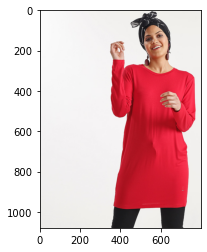

In [163]:
plt.imshow(image)
plt.show()

In [164]:
image_array.shape

(1080, 800, 3)

In [165]:
img_resized = image.resize((100,135))

In [153]:
np.array(img_resized).shape

(135, 100, 3)

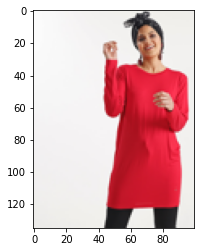

In [154]:
plt.imshow(img_resized)
plt.show()

In [166]:
np.array(img_resized).shape

(135, 100, 3)

In [ ]:
input_images = []
input_poses = []
labels =[]
for each in prod_cat:
       
    try:
        image = Image.open("C:/Users/IDU/Desktop/dataset/"+ each[0]+".jpg")
        image = image.convert('RGB')
        image_array = image.resize((100, 135)) # Use PIL to resize
        print(np.array(input_images).shape)
        
        print(each[0])
        print(np.array(image_array, dtype="object").shape)
        
        labels.append(each[1])
        #print( np.array(image_array).shape)
        input_images.append(np.array(image_array) )
        pose_path = "C:/Users/IDU/OneDrive - GTÜ/Desktop/TEZ/poses/NPdata/"+ each[0]+".npy"
        input_poses.append(np.load(pose_path, allow_pickle=True))
        
    except:
        print("Something went wrong", each[0])
    
   

(0,)
1001277
(135, 100, 3)
(1, 135, 100, 3)
1001279
(135, 100, 3)
(2, 135, 100, 3)
1001317
(135, 100, 3)
(3, 135, 100, 3)
1001804
(135, 100, 3)
(4, 135, 100, 3)
1001814
(135, 100, 3)
(5, 135, 100, 3)
1001815
(135, 100, 3)
(6, 135, 100, 3)
1001816
(135, 100, 3)
(7, 135, 100, 3)
1001817
(135, 100, 3)
(8, 135, 100, 3)
1001818
(135, 100, 3)
(9, 135, 100, 3)
1002403
(135, 100, 3)
(10, 135, 100, 3)
1002417
(135, 100, 3)
(11, 135, 100, 3)
1002418
(135, 100, 3)
(12, 135, 100, 3)
1002419
(135, 100, 3)
(13, 135, 100, 3)
1002420
(135, 100, 3)
(14, 135, 100, 3)
1002421
(135, 100, 3)
(15, 135, 100, 3)
1002422
(135, 100, 3)
(16, 135, 100, 3)
1002423
(135, 100, 3)
(17, 135, 100, 3)
1002424
(135, 100, 3)
(18, 135, 100, 3)
1002431
(135, 100, 3)
(19, 135, 100, 3)
100389
(135, 100, 3)
(20, 135, 100, 3)
100390
(135, 100, 3)
(21, 135, 100, 3)
1006098
(135, 100, 3)
(22, 135, 100, 3)
1006099
(135, 100, 3)
(23, 135, 100, 3)
1006100
(135, 100, 3)
(24, 135, 100, 3)
1006101
(135, 100, 3)
(25, 135, 100, 3)
100610

(135, 100, 3)
(205, 135, 100, 3)
1049450
(135, 100, 3)
(206, 135, 100, 3)
1049455
(135, 100, 3)
(207, 135, 100, 3)
1049456
(135, 100, 3)
(208, 135, 100, 3)
1049457
(135, 100, 3)
(209, 135, 100, 3)
1049458
(135, 100, 3)
(210, 135, 100, 3)
1049461
(135, 100, 3)
(211, 135, 100, 3)
1049462
(135, 100, 3)
(212, 135, 100, 3)
1049463
(135, 100, 3)
(213, 135, 100, 3)
1049464
(135, 100, 3)
(214, 135, 100, 3)
1049465
(135, 100, 3)
(215, 135, 100, 3)
1049466
(135, 100, 3)
(216, 135, 100, 3)
1049467
(135, 100, 3)
(217, 135, 100, 3)
1049468
(135, 100, 3)
(218, 135, 100, 3)
1049469
(135, 100, 3)
(219, 135, 100, 3)
1049473
(135, 100, 3)
(220, 135, 100, 3)
1049474
(135, 100, 3)
(221, 135, 100, 3)
1049478
(135, 100, 3)
(222, 135, 100, 3)
1049479
(135, 100, 3)
(223, 135, 100, 3)
1049480
(135, 100, 3)
(224, 135, 100, 3)
1049481
(135, 100, 3)
(225, 135, 100, 3)
1049482
(135, 100, 3)
(226, 135, 100, 3)
1049483
(135, 100, 3)
(227, 135, 100, 3)
1049484
(135, 100, 3)
(228, 135, 100, 3)
1049485
(135, 100, 3)
(2

(405, 135, 100, 3)
1067976
(135, 100, 3)
(406, 135, 100, 3)
1067978
(135, 100, 3)
(407, 135, 100, 3)
1067979
(135, 100, 3)
(408, 135, 100, 3)
1067980
(135, 100, 3)
(409, 135, 100, 3)
1067981
(135, 100, 3)
(410, 135, 100, 3)
1067982
(135, 100, 3)
(411, 135, 100, 3)
1067983
(135, 100, 3)
(412, 135, 100, 3)
1067984
(135, 100, 3)
(413, 135, 100, 3)
1067986
(135, 100, 3)
(414, 135, 100, 3)
1067987
(135, 100, 3)
(415, 135, 100, 3)
1067988
(135, 100, 3)
(416, 135, 100, 3)
1067990
(135, 100, 3)
(417, 135, 100, 3)
1067991
(135, 100, 3)
(418, 135, 100, 3)
1067993
(135, 100, 3)
(419, 135, 100, 3)
1067995
(135, 100, 3)
(420, 135, 100, 3)
1067996
(135, 100, 3)
(421, 135, 100, 3)
1067997
(135, 100, 3)
(422, 135, 100, 3)
1067998
(135, 100, 3)
(423, 135, 100, 3)
1067999
(135, 100, 3)
(424, 135, 100, 3)
1068000
(135, 100, 3)
(425, 135, 100, 3)
1068001
(135, 100, 3)
(426, 135, 100, 3)
1068002
(135, 100, 3)
(427, 135, 100, 3)
1068003
(135, 100, 3)
(428, 135, 100, 3)
1068004
(135, 100, 3)
(429, 135, 100, 

(607, 135, 100, 3)
1076625
(135, 100, 3)
(608, 135, 100, 3)
1076626
(135, 100, 3)
(609, 135, 100, 3)
1076627
(135, 100, 3)
(610, 135, 100, 3)
1076628
(135, 100, 3)
(611, 135, 100, 3)
1076629
(135, 100, 3)
(612, 135, 100, 3)
1076630
(135, 100, 3)
(613, 135, 100, 3)
1076631
(135, 100, 3)
(614, 135, 100, 3)
1076632
(135, 100, 3)
(615, 135, 100, 3)
1076633
(135, 100, 3)
(616, 135, 100, 3)
1076634
(135, 100, 3)
(617, 135, 100, 3)
1076635
(135, 100, 3)
(618, 135, 100, 3)
1076636
(135, 100, 3)
(619, 135, 100, 3)
1076637
(135, 100, 3)
(620, 135, 100, 3)
1076638
(135, 100, 3)
(621, 135, 100, 3)
1076639
(135, 100, 3)
(622, 135, 100, 3)
1076640
(135, 100, 3)
(623, 135, 100, 3)
1076641
(135, 100, 3)
(624, 135, 100, 3)
1076642
(135, 100, 3)
(625, 135, 100, 3)
1076643
(135, 100, 3)
(626, 135, 100, 3)
1076644
(135, 100, 3)
(627, 135, 100, 3)
1076645
(135, 100, 3)
(628, 135, 100, 3)
1076716
(135, 100, 3)
(629, 135, 100, 3)
1076718
(135, 100, 3)
(630, 135, 100, 3)
1076724
(135, 100, 3)
(631, 135, 100, 

(808, 135, 100, 3)
1096675
(135, 100, 3)
(809, 135, 100, 3)
1096846
(135, 100, 3)
(810, 135, 100, 3)
1096847
(135, 100, 3)
(811, 135, 100, 3)
1096860
(135, 100, 3)
(812, 135, 100, 3)
1096933
(135, 100, 3)
(813, 135, 100, 3)
1097089
(135, 100, 3)
(814, 135, 100, 3)
1097090
(135, 100, 3)
(815, 135, 100, 3)
1097091
(135, 100, 3)
(816, 135, 100, 3)
1097160
(135, 100, 3)
(817, 135, 100, 3)
1097171
(135, 100, 3)
(818, 135, 100, 3)
1097172
(135, 100, 3)
(819, 135, 100, 3)
1097193
(135, 100, 3)
(820, 135, 100, 3)
1097194
(135, 100, 3)
(821, 135, 100, 3)
1097202
(135, 100, 3)
(822, 135, 100, 3)
1097525
(135, 100, 3)
(823, 135, 100, 3)
1097526
(135, 100, 3)
(824, 135, 100, 3)
1097576
(135, 100, 3)
(825, 135, 100, 3)
1097900
(135, 100, 3)
(826, 135, 100, 3)
1099023
(135, 100, 3)
(827, 135, 100, 3)
1099497
(135, 100, 3)
(828, 135, 100, 3)
1099498
(135, 100, 3)
(829, 135, 100, 3)
1099499
(135, 100, 3)
(830, 135, 100, 3)
1099500
(135, 100, 3)
(831, 135, 100, 3)
1099506
(135, 100, 3)
(832, 135, 100, 

(135, 100, 3)
(1010, 135, 100, 3)
1106507
(135, 100, 3)
(1011, 135, 100, 3)
1107657
(135, 100, 3)
(1012, 135, 100, 3)
1107658
(135, 100, 3)
(1013, 135, 100, 3)
1107659
(135, 100, 3)
(1014, 135, 100, 3)
1108246
(135, 100, 3)
(1015, 135, 100, 3)
1108247
(135, 100, 3)
(1016, 135, 100, 3)
1108370
(135, 100, 3)
(1017, 135, 100, 3)
1108371
(135, 100, 3)
(1018, 135, 100, 3)
1108373
(135, 100, 3)
(1019, 135, 100, 3)
1108375
(135, 100, 3)
(1020, 135, 100, 3)
1108376
(135, 100, 3)
(1021, 135, 100, 3)
1108377
(135, 100, 3)
(1022, 135, 100, 3)
1108438
(135, 100, 3)
(1023, 135, 100, 3)
1108612
(135, 100, 3)
(1024, 135, 100, 3)
1108620
(135, 100, 3)
(1025, 135, 100, 3)
1108758
(135, 100, 3)
(1026, 135, 100, 3)
1108759
(135, 100, 3)
(1027, 135, 100, 3)
1108760
(135, 100, 3)
(1028, 135, 100, 3)
1108761
(135, 100, 3)
(1029, 135, 100, 3)
1108762
(135, 100, 3)
(1030, 135, 100, 3)
1108763
(135, 100, 3)
(1031, 135, 100, 3)
1108764
(135, 100, 3)
(1032, 135, 100, 3)
1108765
(135, 100, 3)
(1033, 135, 100, 3)


(1207, 135, 100, 3)
1130561
(135, 100, 3)
(1208, 135, 100, 3)
1130643
(135, 100, 3)
(1209, 135, 100, 3)
1130836
(135, 100, 3)
(1210, 135, 100, 3)
1130887
(135, 100, 3)
(1211, 135, 100, 3)
1134066
(135, 100, 3)
(1212, 135, 100, 3)
1134403
(135, 100, 3)
(1213, 135, 100, 3)
1134830
(135, 100, 3)
(1214, 135, 100, 3)
1134831
(135, 100, 3)
(1215, 135, 100, 3)
1136294
(135, 100, 3)
(1216, 135, 100, 3)
1138253
(135, 100, 3)
(1217, 135, 100, 3)
1138824
(135, 100, 3)
(1218, 135, 100, 3)
1138860
(135, 100, 3)
(1219, 135, 100, 3)
1139335
(135, 100, 3)
(1220, 135, 100, 3)
1139794
(135, 100, 3)
Something went wrong 1139797
(1221, 135, 100, 3)
1139798
(135, 100, 3)
(1222, 135, 100, 3)
1139800
(135, 100, 3)
(1223, 135, 100, 3)
1140023
(135, 100, 3)
(1224, 135, 100, 3)
1140024
(135, 100, 3)
(1225, 135, 100, 3)
1140025
(135, 100, 3)
(1226, 135, 100, 3)
1140026
(135, 100, 3)
(1227, 135, 100, 3)
1140027
(135, 100, 3)
(1228, 135, 100, 3)
1140028
(135, 100, 3)
(1229, 135, 100, 3)
1140384
(135, 100, 3)
(1230

1159309
(135, 100, 3)
(1405, 135, 100, 3)
1159310
(135, 100, 3)
(1406, 135, 100, 3)
1159311
(135, 100, 3)
(1407, 135, 100, 3)
1159448
(135, 100, 3)
(1408, 135, 100, 3)
1159449
(135, 100, 3)
(1409, 135, 100, 3)
1159450
(135, 100, 3)
(1410, 135, 100, 3)
1159451
(135, 100, 3)
(1411, 135, 100, 3)
1159452
(135, 100, 3)
(1412, 135, 100, 3)
1159453
(135, 100, 3)
(1413, 135, 100, 3)
1159454
(135, 100, 3)
(1414, 135, 100, 3)
1159455
(135, 100, 3)
(1415, 135, 100, 3)
1159456
(135, 100, 3)
(1416, 135, 100, 3)
1159457
(135, 100, 3)
(1417, 135, 100, 3)
1159458
(135, 100, 3)
(1418, 135, 100, 3)
1159460
(135, 100, 3)
(1419, 135, 100, 3)
1159461
(135, 100, 3)
(1420, 135, 100, 3)
1159462
(135, 100, 3)
(1421, 135, 100, 3)
1159463
(135, 100, 3)
(1422, 135, 100, 3)
1159464
(135, 100, 3)
(1423, 135, 100, 3)
1159465
(135, 100, 3)
(1424, 135, 100, 3)
1159466
(135, 100, 3)
(1425, 135, 100, 3)
1159467
(135, 100, 3)
(1426, 135, 100, 3)
1159468
(135, 100, 3)
(1427, 135, 100, 3)
1159469
(135, 100, 3)
(1428, 135, 

(1601, 135, 100, 3)
1167277
(135, 100, 3)
(1602, 135, 100, 3)
1167576
(135, 100, 3)
(1603, 135, 100, 3)
1167639
(135, 100, 3)
(1604, 135, 100, 3)
1167640
(135, 100, 3)
(1605, 135, 100, 3)
1167641
(135, 100, 3)
(1606, 135, 100, 3)
1167642
(135, 100, 3)
(1607, 135, 100, 3)
1167643
(135, 100, 3)
(1608, 135, 100, 3)
1167644
(135, 100, 3)
(1609, 135, 100, 3)
1167645
(135, 100, 3)
(1610, 135, 100, 3)
1167646
(135, 100, 3)
(1611, 135, 100, 3)
1167647
(135, 100, 3)
(1612, 135, 100, 3)
1167648
(135, 100, 3)
(1613, 135, 100, 3)
1167649
(135, 100, 3)
(1614, 135, 100, 3)
1167656
(135, 100, 3)
(1615, 135, 100, 3)
1167657
(135, 100, 3)
(1616, 135, 100, 3)
1167658
(135, 100, 3)
(1617, 135, 100, 3)
1167659
(135, 100, 3)
(1618, 135, 100, 3)
1167674
(135, 100, 3)
(1619, 135, 100, 3)
1167675
(135, 100, 3)
(1620, 135, 100, 3)
1167676
(135, 100, 3)
(1621, 135, 100, 3)
1167677
(135, 100, 3)
(1622, 135, 100, 3)
1167680
(135, 100, 3)
(1623, 135, 100, 3)
1167681
(135, 100, 3)
(1624, 135, 100, 3)
1167682
(135, 

(1799, 135, 100, 3)
1200526
(135, 100, 3)
(1800, 135, 100, 3)
1200747
(135, 100, 3)
(1801, 135, 100, 3)
1200748
(135, 100, 3)
(1802, 135, 100, 3)
1200749
(135, 100, 3)
(1803, 135, 100, 3)
1200751
(135, 100, 3)
(1804, 135, 100, 3)
1200752
(135, 100, 3)
(1805, 135, 100, 3)
1200753
(135, 100, 3)
(1806, 135, 100, 3)
1200754
(135, 100, 3)
(1807, 135, 100, 3)
1200755
(135, 100, 3)
(1808, 135, 100, 3)
1201062
(135, 100, 3)
(1809, 135, 100, 3)
1201063
(135, 100, 3)
(1810, 135, 100, 3)
1201064
(135, 100, 3)
(1811, 135, 100, 3)
1201066
(135, 100, 3)
(1812, 135, 100, 3)
1201068
(135, 100, 3)
(1813, 135, 100, 3)
1201069
(135, 100, 3)
(1814, 135, 100, 3)
1201070
(135, 100, 3)
(1815, 135, 100, 3)
1201071
(135, 100, 3)
(1816, 135, 100, 3)
1201072
(135, 100, 3)
(1817, 135, 100, 3)
1201088
(135, 100, 3)
(1818, 135, 100, 3)
1201121
(135, 100, 3)
(1819, 135, 100, 3)
1201122
(135, 100, 3)
(1820, 135, 100, 3)
1201123
(135, 100, 3)
(1821, 135, 100, 3)
1201124
(135, 100, 3)
(1822, 135, 100, 3)
1201146
(135, 

(1996, 135, 100, 3)
1244979
(135, 100, 3)
(1997, 135, 100, 3)
1244980
(135, 100, 3)
(1998, 135, 100, 3)
1244981
(135, 100, 3)
(1999, 135, 100, 3)
1244991
(135, 100, 3)
(2000, 135, 100, 3)
1244992
(135, 100, 3)
(2001, 135, 100, 3)
1244993
(135, 100, 3)
(2002, 135, 100, 3)
1244994
(135, 100, 3)
(2003, 135, 100, 3)
1244995
(135, 100, 3)
(2004, 135, 100, 3)
1244996
(135, 100, 3)
(2005, 135, 100, 3)
1244997
(135, 100, 3)
(2006, 135, 100, 3)
1244998
(135, 100, 3)
(2007, 135, 100, 3)
1244999
(135, 100, 3)
(2008, 135, 100, 3)
1245000
(135, 100, 3)
(2009, 135, 100, 3)
1245001
(135, 100, 3)
(2010, 135, 100, 3)
1245003
(135, 100, 3)
(2011, 135, 100, 3)
1245004
(135, 100, 3)
(2012, 135, 100, 3)
1245102
(135, 100, 3)
(2013, 135, 100, 3)
1245113
(135, 100, 3)
(2014, 135, 100, 3)
1245114
(135, 100, 3)
(2015, 135, 100, 3)
1245116
(135, 100, 3)
(2016, 135, 100, 3)
1245118
(135, 100, 3)
(2017, 135, 100, 3)
1245126
(135, 100, 3)
(2018, 135, 100, 3)
1245130
(135, 100, 3)
(2019, 135, 100, 3)
1245156
(135, 

(135, 100, 3)
(2191, 135, 100, 3)
1278424
(135, 100, 3)
(2192, 135, 100, 3)
1278429
(135, 100, 3)
(2193, 135, 100, 3)
1278805
(135, 100, 3)
(2194, 135, 100, 3)
1278807
(135, 100, 3)
(2195, 135, 100, 3)
1278823
(135, 100, 3)
(2196, 135, 100, 3)
1278824
(135, 100, 3)
(2197, 135, 100, 3)
1278825
(135, 100, 3)
(2198, 135, 100, 3)
1278826
(135, 100, 3)
(2199, 135, 100, 3)
1278827
(135, 100, 3)
(2200, 135, 100, 3)
1278828
(135, 100, 3)
(2201, 135, 100, 3)
1278829
(135, 100, 3)
(2202, 135, 100, 3)
1278831
(135, 100, 3)
(2203, 135, 100, 3)
1278832
(135, 100, 3)
(2204, 135, 100, 3)
1278833
(135, 100, 3)
(2205, 135, 100, 3)
1278834
(135, 100, 3)
(2206, 135, 100, 3)
1278841
(135, 100, 3)
(2207, 135, 100, 3)
1278842
(135, 100, 3)
(2208, 135, 100, 3)
1278843
(135, 100, 3)
(2209, 135, 100, 3)
1278844
(135, 100, 3)
(2210, 135, 100, 3)
1278845
(135, 100, 3)
(2211, 135, 100, 3)
1278846
(135, 100, 3)
(2212, 135, 100, 3)
1278873
(135, 100, 3)
(2213, 135, 100, 3)
1278874
(135, 100, 3)
(2214, 135, 100, 3)


(135, 100, 3)
(2385, 135, 100, 3)
1299214
(135, 100, 3)
(2386, 135, 100, 3)
1299216
(135, 100, 3)
(2387, 135, 100, 3)
1299221
(135, 100, 3)
(2388, 135, 100, 3)
1299223
(135, 100, 3)
(2389, 135, 100, 3)
1299244
(135, 100, 3)
(2390, 135, 100, 3)
1299245
(135, 100, 3)
(2391, 135, 100, 3)
1299246
(135, 100, 3)
(2392, 135, 100, 3)
1299247
(135, 100, 3)
(2393, 135, 100, 3)
1299453
(135, 100, 3)
(2394, 135, 100, 3)
1299454
(135, 100, 3)
(2395, 135, 100, 3)
1299455
(135, 100, 3)
(2396, 135, 100, 3)
1299500
(135, 100, 3)
(2397, 135, 100, 3)
1299501
(135, 100, 3)
(2398, 135, 100, 3)
1299502
(135, 100, 3)
(2399, 135, 100, 3)
1299529
(135, 100, 3)
(2400, 135, 100, 3)
1299530
(135, 100, 3)
(2401, 135, 100, 3)
1299531
(135, 100, 3)
(2402, 135, 100, 3)
1299532
(135, 100, 3)
(2403, 135, 100, 3)
1299533
(135, 100, 3)
(2404, 135, 100, 3)
1300793
(135, 100, 3)
(2405, 135, 100, 3)
1300794
(135, 100, 3)
(2406, 135, 100, 3)
1300877
(135, 100, 3)
(2407, 135, 100, 3)
1300878
(135, 100, 3)
(2408, 135, 100, 3)


(2580, 135, 100, 3)
1323251
(135, 100, 3)
(2581, 135, 100, 3)
1323252
(135, 100, 3)
(2582, 135, 100, 3)
1323253
(135, 100, 3)
(2583, 135, 100, 3)
1323254
(135, 100, 3)
(2584, 135, 100, 3)
1323263
(135, 100, 3)
(2585, 135, 100, 3)
1323264
(135, 100, 3)
(2586, 135, 100, 3)
1323265
(135, 100, 3)
(2587, 135, 100, 3)
1323266
(135, 100, 3)
(2588, 135, 100, 3)
1323267
(135, 100, 3)
(2589, 135, 100, 3)
1323268
(135, 100, 3)
(2590, 135, 100, 3)
1323269
(135, 100, 3)
(2591, 135, 100, 3)
1323270
(135, 100, 3)
(2592, 135, 100, 3)
1323271
(135, 100, 3)
(2593, 135, 100, 3)
1323272
(135, 100, 3)
(2594, 135, 100, 3)
1323273
(135, 100, 3)
(2595, 135, 100, 3)
1323274
(135, 100, 3)
(2596, 135, 100, 3)
1323275
(135, 100, 3)
(2597, 135, 100, 3)
1323276
(135, 100, 3)
(2598, 135, 100, 3)
1323277
(135, 100, 3)
(2599, 135, 100, 3)
1323296
(135, 100, 3)
(2600, 135, 100, 3)
1324692
(135, 100, 3)
(2601, 135, 100, 3)
1324693
(135, 100, 3)
(2602, 135, 100, 3)
1324751
(135, 100, 3)
(2603, 135, 100, 3)
1324917
(135, 

(2776, 135, 100, 3)
1347989
(135, 100, 3)
(2777, 135, 100, 3)
1347990
(135, 100, 3)
(2778, 135, 100, 3)
1347991
(135, 100, 3)
(2779, 135, 100, 3)
1347992
(135, 100, 3)
(2780, 135, 100, 3)
1347993
(135, 100, 3)
(2781, 135, 100, 3)
1347994
(135, 100, 3)
(2782, 135, 100, 3)
1347995
(135, 100, 3)
(2783, 135, 100, 3)
1347996
(135, 100, 3)
(2784, 135, 100, 3)
1347997
(135, 100, 3)
(2785, 135, 100, 3)
1347998
(135, 100, 3)
(2786, 135, 100, 3)
1348001
(135, 100, 3)
(2787, 135, 100, 3)
1348002
(135, 100, 3)
(2788, 135, 100, 3)
1348003
(135, 100, 3)
(2789, 135, 100, 3)
1355311
(135, 100, 3)
(2790, 135, 100, 3)
1355387
(135, 100, 3)
(2791, 135, 100, 3)
1355389
(135, 100, 3)
(2792, 135, 100, 3)
1355393
(135, 100, 3)
(2793, 135, 100, 3)
1355524
(135, 100, 3)
(2794, 135, 100, 3)
1355525
(135, 100, 3)
(2795, 135, 100, 3)
1355527
(135, 100, 3)
(2796, 135, 100, 3)
1355528
(135, 100, 3)
(2797, 135, 100, 3)
1355529
(135, 100, 3)
(2798, 135, 100, 3)
1356485
(135, 100, 3)
(2799, 135, 100, 3)
1356486
(135, 

## Debug to solve the error of "VisibleDeprecationWarning (ndarray from ragged nested sequences)"

In [267]:
image = Image.open("C:/Users/IDU/Desktop/dataset/"+prod_cat[603][0]+".jpg")

In [296]:
image.mode

'RGBA'

In [297]:
rgb_image = image.convert('RGB')

In [299]:
rgb_image.size

(800, 1080)

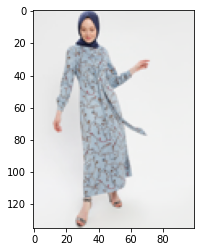

In [300]:
image_array = rgb_image.resize((100,135)) 

plt.imshow(image_array)
input_images.append(np.array(image_array,dtype=object) )

In [301]:
np.array(image_array).shape

(135, 100, 3)

In [248]:
image_array = np.array(image_array) / 255

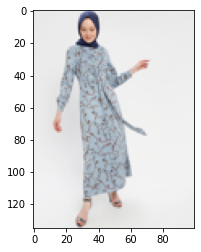

In [250]:

plt.imshow(image_array)

input_images.append(np.array(image_array) )

Images are ready

In [293]:
#save inputs & output
np.save(r"C:\Users\IDU\OneDrive - GTÜ\Desktop\TEZ\poses\input_poses.npy", np.array(input_poses), allow_pickle=True)
np.save(r"C:\Users\IDU\OneDrive - GTÜ\Desktop\TEZ\poses\labels.npy", np.array(labels), allow_pickle=True)
np.save(r"C:\Users\IDU\OneDrive - GTÜ\Desktop\TEZ\poses\input_images.npy", np.array(input_images, dtype=object), allow_pickle=True)

In [288]:
np.array(input_images).shape

C:\Users\IDU\AppData\Local\Temp/ipykernel_6988/523013005.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(input_images).shape


ValueError: could not broadcast input array from shape (135,100,3) into shape (135,100)

In [ ]:
np.array(input_poses).shape

In [ ]:
np.array(labels).shape

In [ ]:
HEIGHT= 135
WIDTH = 100

input_tensor = Input(shape=(HEIGHT, WIDTH, 3))
pose_tensor = Input(shape=np.array(input_poses).shape)

base_model = ResNet50(
    include_top=False, weights=None, input_tensor=input_tensor,
    input_shape=None)

x= base_model.output
x= GlobalAveragePooling2D()(x)
x= Flatten()(x)

p= Flatten()(pose_tensor)
p= Dense(2048,activation="relu")(p)
print(x.shape)
print(p.shape)
concat = tf.concat([x, p],axis=0 )

x= Dense(1024,activation='relu')(x) 
x= Dense(3)(x) 

model= Model(inputs=[base_model.input,p.input],outputs=x)


In [ ]:
model.compile( optimizer= "adam", loss="sparse_categorical_crossentropy", metrics= ['accuracy'] )

In [ ]:
label_encoder = LabelEncoder()
l = label_encoder.fit_transform(labels)

In [38]:
#l=l.reshape(-1,1)

In [39]:
l

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [40]:
l.shape

(10,)

In [65]:
input_images = np.array(input_images)
input_poses = np.array(input_poses)

C:\Users\IDU\AppData\Local\Temp/ipykernel_6988/2557844545.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  input_images = np.array(input_images)


ValueError: could not broadcast input array from shape (135,100,3) into shape (135,100)

In [ ]:
input_images.shape

In [ ]:
history= model.fit(x= input_images , y= l,
          batch_size=32,
          epochs= 100)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

In [33]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 135, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 141, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 68, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 68, 50, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________